## Examen 3
<a href="https://colab.research.google.com/github/restrepo/ComputationalMethods/blob/master/exams/Examen_2020_2_03_enunciado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
1) Determine el espacio de configuraciones, en los ejes $(x,\omega)$, del movimiento horizontal sin fricción de una masa de $0.2\ \text{Kg}$ atada a un resorte de constante elástica $k=1\ \text{N/m}$.


2) Considere una muestra de Strontium-90, ${}^{98}_{38}\text{Sr}$, que contieme inicialmente 1000 núcleos de Strontium-90 sin decaer. En la base de datos: 

[https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json](https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json) 

se tienen los datos de decaimiento durante 200 años. Despues de 10 años quedan 809 nucleos sin decaer, después de 22 años quedan 564 y así sucesivamente. 

El decaimiento radiativo está determinado por la formula
$$
N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}
$$
* $N(t)$ es el número de núcleos radioactivos que qedan despues de un tiempo $t$
* $N_0$ es el número inicial de las partículas presentes (es decir, $t=0$)
* $\lambda$ es la constante de decaimiento
* $\tau$ es la vida medía, es decir, el tiempo durante el cual la mitad de la muestra radioactiva ha decaído.

(a) Realice un fit a los datos y determine la vida media con su respectivo error.

(b) Grafique los datos como puntos en el plano $t$, $N(t)$ y el correspondiente al fit

## Punto 1 

El lagrangiano del sistema para este movimiento seria :

$ L = T - V $ con $T = \frac{1}{2}m\dot{x}$ y $ V = \frac{1}{2}kx$ asi :

$ L = \frac{1}{2}m\dot{x} -\frac{1}{2}kx $ dadas la condiciones del sitema la evolución en el tiempo es :

$ \frac{d}{dt}(\frac{\partial{L}}{\partial{\dot{x}}}) - \frac{\partial{L}}{\partial{x}} = 0 $ de aqui se obtiene que : 

$\ddot{x}-\frac{k}{m}x = 0 $ dado que $\frac{dx}{dt} = v $ la ecuacion anterior tomaria la forma $$ \dot{v}  -\frac{k}{m}x = 0$$ ecuacion diferencial de primer orden que sera solucionada con la libraria de odeint de scipy.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import pandas as pd

In [4]:
## definimos las constantes

k = 1 # constante elastica en N/m
m = 0.2 # masa en kg

def Ec(y,t): # definición 
  v,x = y
  dydt = [-(k/m)*x,v]  
  return dydt

y0 = [1,0] # condiciones iniciales 



In [5]:
t  = np.arange(0, 20, 0.1)# espacio temporal
sol = odeint(Ec,y0, t) # libreria para solucionar 


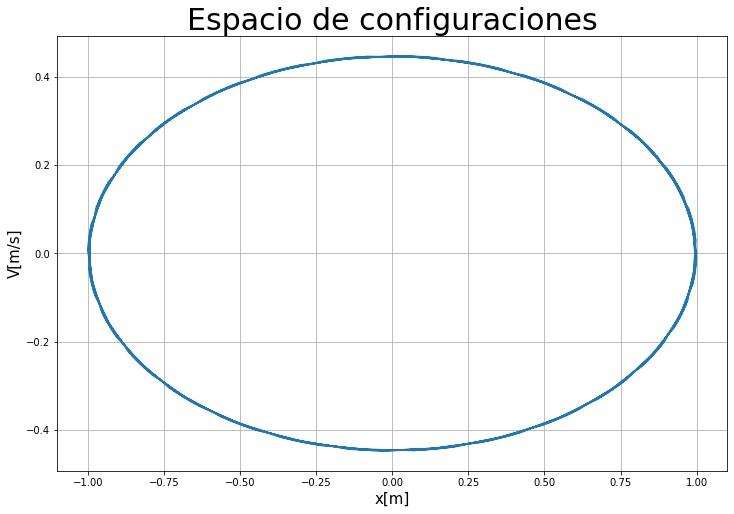

In [6]:
plt.figure(figsize=(12,8))
plt.plot(sol[:,0],sol[:,1])
plt.title('Espacio de configuraciones',fontsize = 30)
plt.xlabel('x[m]',fontsize = 15)
plt.ylabel('V[m/s]',fontsize = 15)
plt.grid()

# Punto 2

Para esto tenemos utilizar la libreria de curve_fit

In [41]:
df = pd.read_json('https://raw.githubusercontent.com/restrepo/ComputationalMethods/master/data/strontium.json') # leo el archivo y lo convierto en un achivo de pandas


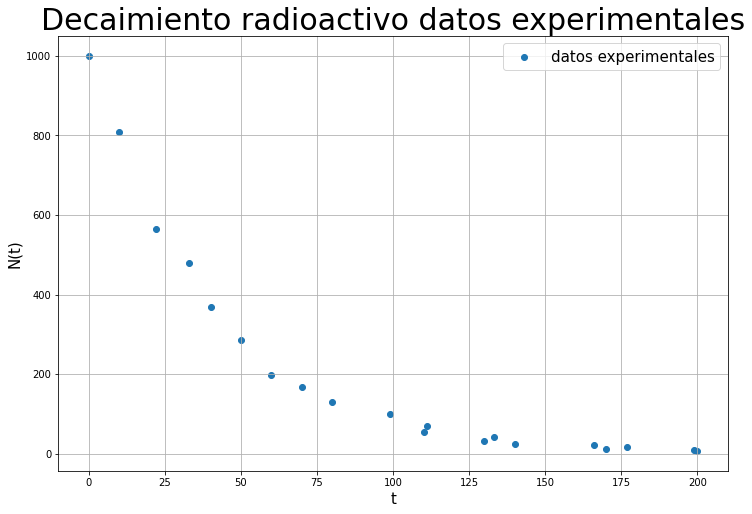

In [43]:
plt.figure(figsize=(12,8))
plt.scatter(df.t,df[['N(t)']],label= 'datos experimentales' )
plt.title('Decaimiento radioactivo datos experimentales',fontsize = 30)
plt.xlabel('t',fontsize = 15)
plt.ylabel('N(t)',fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()


In [37]:
N_0 = 100

### definimos la función 
def N(N_0,a,t):
  
  return N_0*np.exp(-(np.log(2)/a)*t)

### utilizo la libreria  

parametros, matriz = curve_fit(N,df.t,df['N(t)'])
Y = N(*parametros,df.t)
print('N_0 es :{}'.format(parametros[0]))
print('tao es :{}'.format(parametros[1]))

N_0 es :65.37656577701203
tao es :58.74475960451126


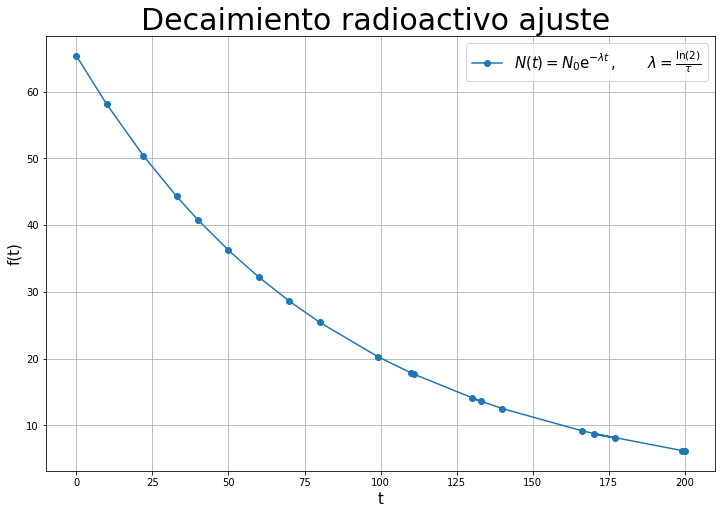

In [39]:
plt.figure(figsize=(12,8))
plt.plot(df.t,Y,'o-',label = r'$N(t)=N_0 \operatorname{e}^{-\lambda t}\,,\qquad \lambda=\frac{\ln(2)}{\tau}$')
plt.title('Decaimiento radioactivo ajuste ',fontsize = 30)
plt.xlabel('t',fontsize = 15)
plt.ylabel('N(t)',fontsize = 15)
plt.legend(fontsize = 15)
plt.grid()
